**1. EDA**

In [1]:
#Data process and analysis libraries
import pandas as pd
import numpy as np

#Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/emrec/Desktop/SML Assignment/MavenRail.csv")
df.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00,2024-01-01 13:30,2024-01-01 13:30,On Time,NaN,No
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45,2024-01-01 11:35,2024-01-01 11:40,Delayed,Signal Failure,No
2,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15,2024-01-02 18:45,2024-01-02 18:45,On Time,NaN,No
3,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30,2024-01-01 22:30,2024-01-01 22:30,On Time,NaN,No
4,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45,2024-01-01 19:00,2024-01-01 19:00,On Time,NaN,No


In [5]:
row_count = len(df)
print(row_count)

31645


In [7]:
null_numbers = df.isnull().sum()
print(null_numbers)

Payment.Method           0
Railcard             20911
Ticket.Class             0
Ticket.Type              0
Price                    0
Departure.Station        0
Arrival.Station          0
Departure                3
Scheduled.Arrival        4
Actual.Arrival        1880
Journey.Status           0
Reason.for.Delay     27479
Refund.Request           0
dtype: int64


In [9]:
df.describe()

,Price
count,31645.000000
mean,23.434634
std,29.990379
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31645 entries, 0 to 31644
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Payment.Method     31645 non-null  object
 1   Railcard           10734 non-null  object
 2   Ticket.Class       31645 non-null  object
 3   Ticket.Type        31645 non-null  object
 4   Price              31645 non-null  int64 
 5   Departure.Station  31645 non-null  object
 6   Arrival.Station    31645 non-null  object
 7   Departure          31642 non-null  object
 8   Scheduled.Arrival  31641 non-null  object
 9   Actual.Arrival     29765 non-null  object
 10  Journey.Status     31645 non-null  object
 11  Reason.for.Delay   4166 non-null   object
 12  Refund.Request     31645 non-null  object
dtypes: int64(1), object(12)
memory usage: 3.1+ MB


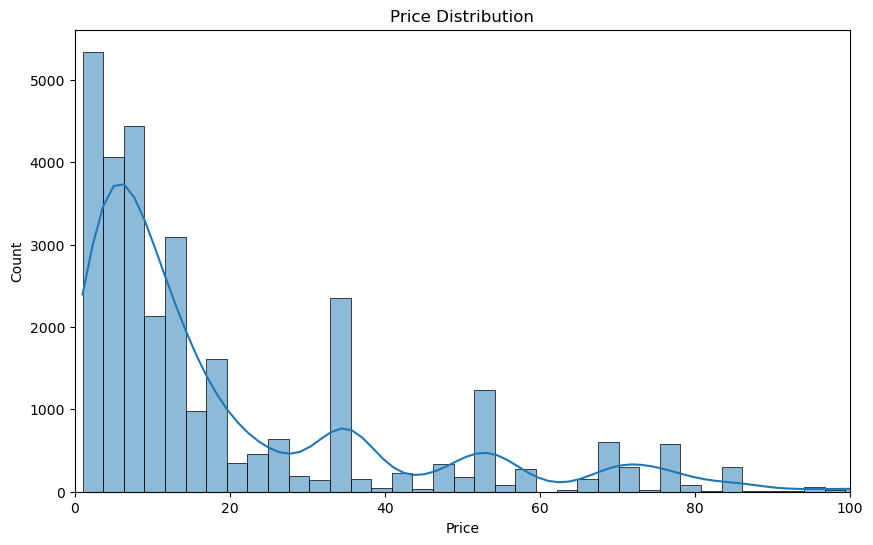

In [13]:
#Price distribution and KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=100, kde=True)
plt.title('Price Distribution')
plt.xlim(0, 100)
plt.show()

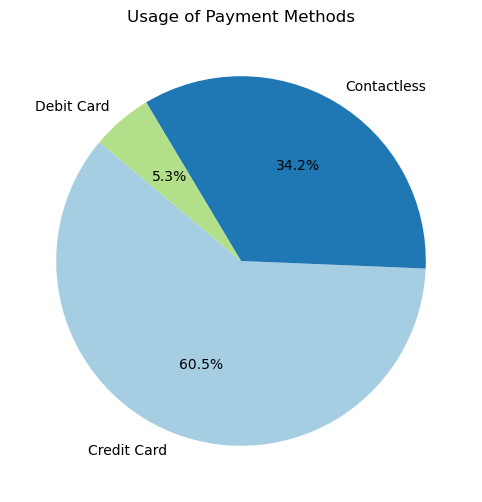

In [14]:
#Payment method distribution
payment_methods = df['Payment.Method'].value_counts()

#Payment method % chart
plt.figure(figsize=(8, 6))
payment_methods.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Usage of Payment Methods')
plt.ylabel('') 
plt.show()


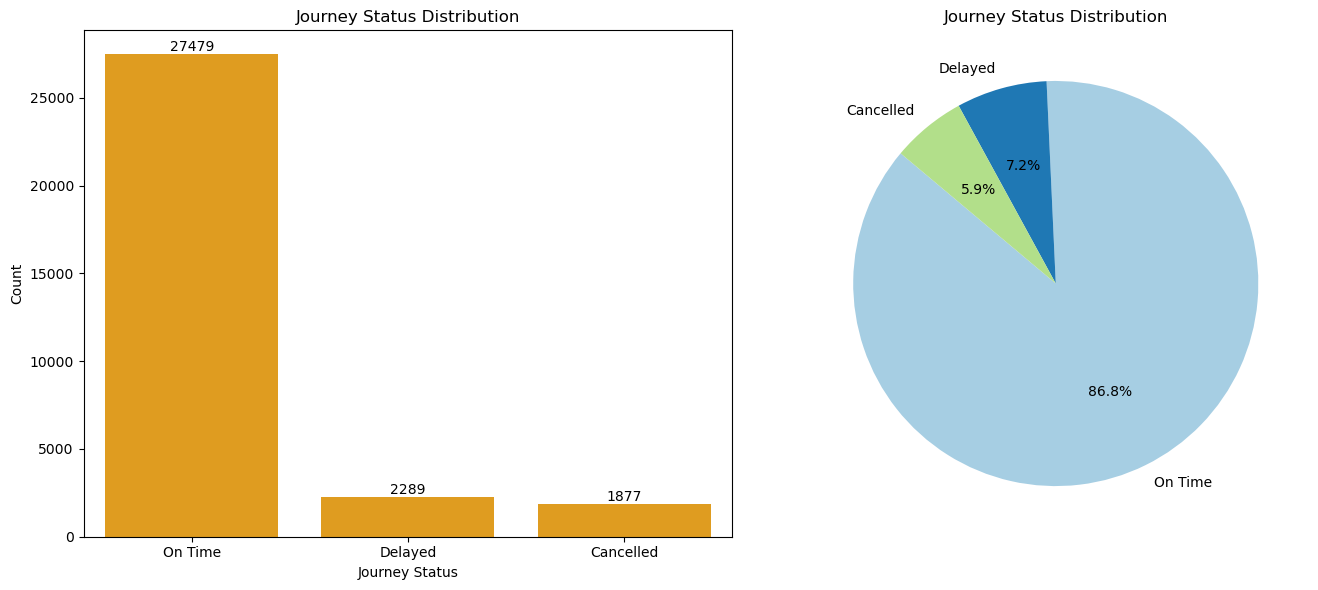

In [15]:
#Journey status distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Bar chart for numbers
ax1 = sns.countplot(x='Journey.Status', data=df, color='orange', ax=axes[0])
ax1.set_title('Journey Status Distribution')
ax1.bar_label(ax1.containers[0])
ax1.set_xlabel('Journey Status')
ax1.set_ylabel('Count')

#Pie chart for percentage
journey_status_counts = df['Journey.Status'].value_counts()
axes[1].pie(journey_status_counts, labels=journey_status_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title('Journey Status Distribution')

plt.tight_layout()
plt.show()


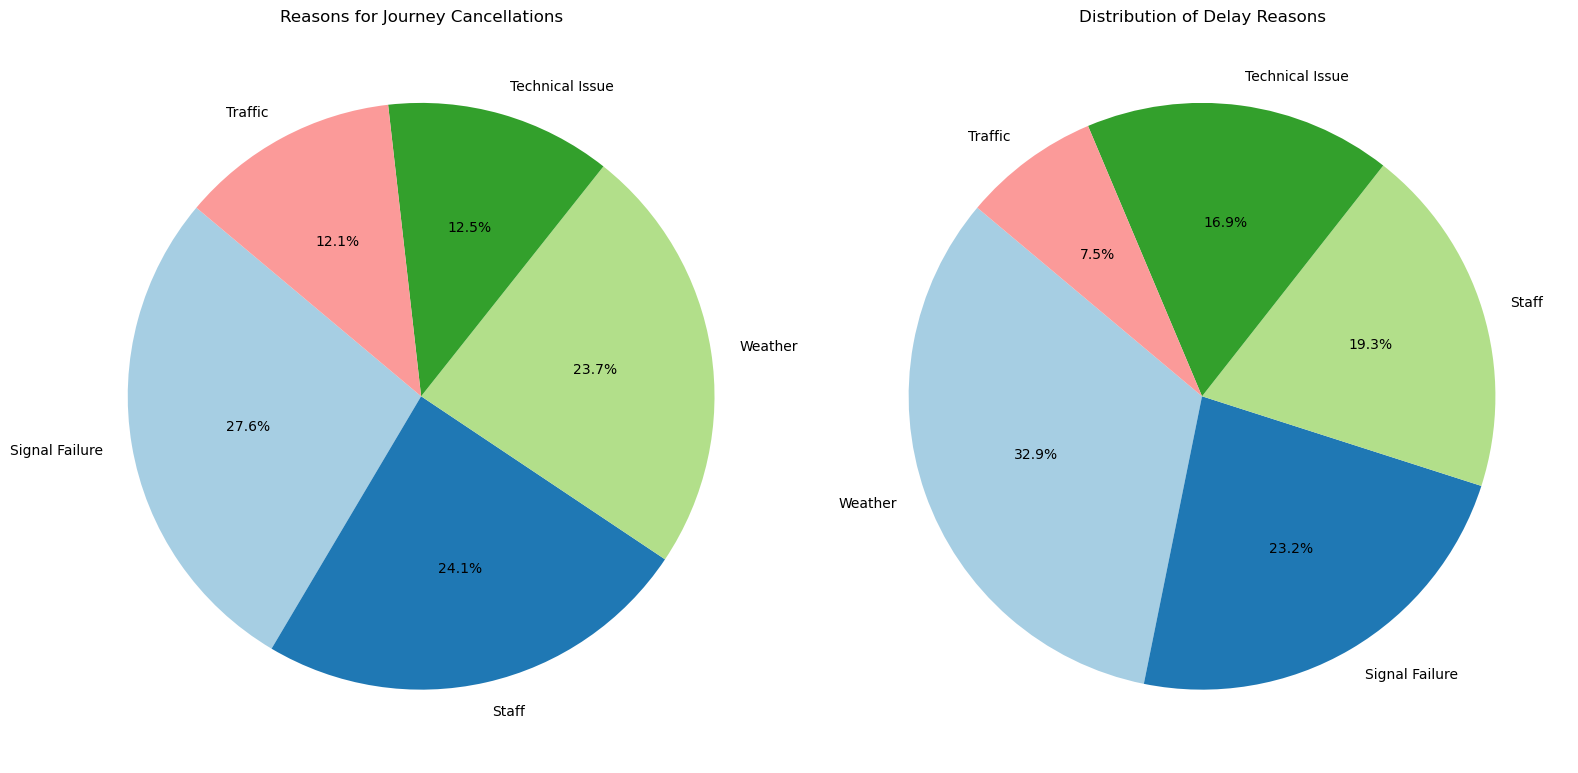

In [16]:
#In dataset, Staff related delays anc cancellations labeled as Staff and Staffing, so we put them together
df['Reason.for.Delay'] = df['Reason.for.Delay'].replace({'Staffing': 'Staff'})

#Calculating the delay reasons and cancellation reasons
delay_reasons = df['Reason.for.Delay'].value_counts()
cancelled_journeys = df[df['Journey.Status'] == 'Cancelled']
cancellation_reasons = cancelled_journeys['Reason.for.Delay'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

#Pie chart for cancellation reasons - distribution
axes[0].pie(cancellation_reasons, labels=cancellation_reasons.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title('Reasons for Journey Cancellations')

#Pie chart for delay reasons - distribution
axes[1].pie(delay_reasons, labels=delay_reasons.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title('Distribution of Delay Reasons')

plt.tight_layout()
plt.show()



In [17]:
#Most used routes among the dataset
top_routes = df.groupby(['Departure.Station', 'Arrival.Station']).size().sort_values(ascending=False).head(10)
top_routes = top_routes.reset_index(name='Count')

top_routes

,Departure.Station,Arrival.Station,Count
0,Manchester Piccadilly,Liverpool Lime Street,4626
1,London Euston,Birmingham New Street,4208
2,London Kings Cross,York,3922
3,London Paddington,Reading,3873
4,London St Pancras,Birmingham New Street,3470
5,Liverpool Lime Street,Manchester Piccadilly,3001
6,Liverpool Lime Street,London Euston,1096
7,London Euston,Manchester Piccadilly,712
8,Birmingham New Street,London St Pancras,701
9,London Paddington,Oxford,485


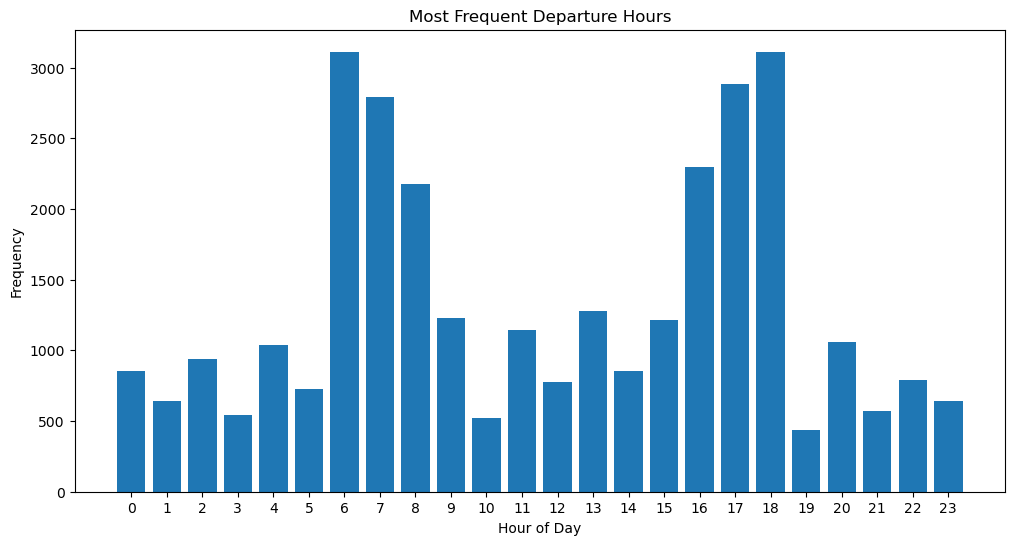

In [18]:
#Most frequent departure hours
df['Departure'] = pd.to_datetime(df['Departure'], errors='coerce')

df['Departure.Hour'] = df['Departure'].dt.hour
hour_counts = df['Departure.Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(hour_counts.index, hour_counts.values)
plt.title('Most Frequent Departure Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.show()

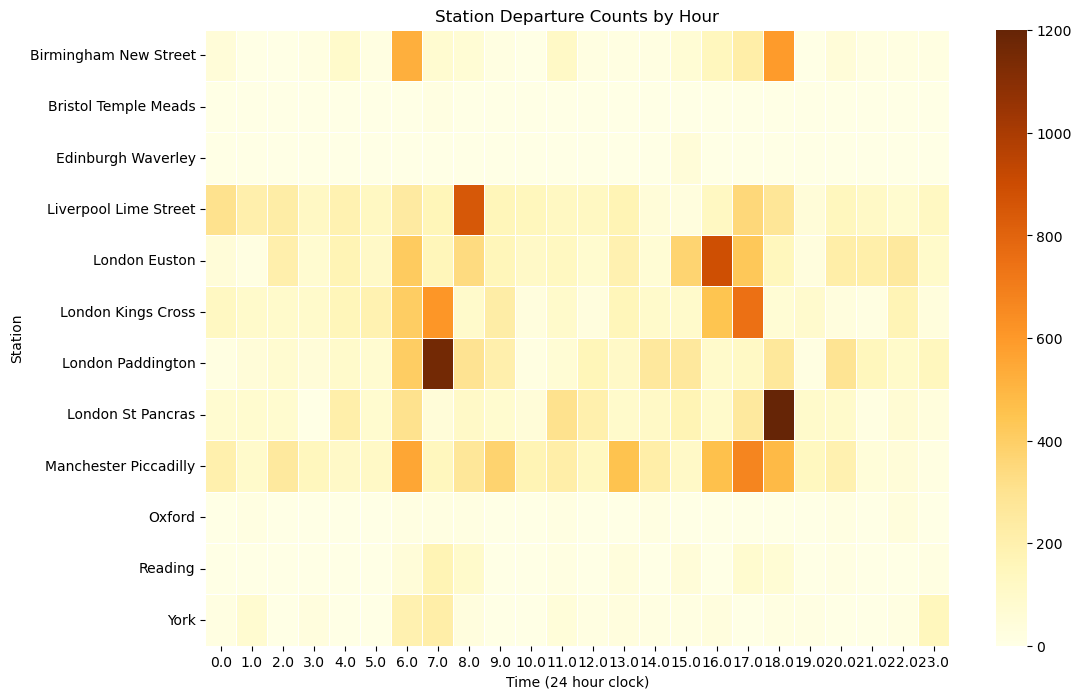

In [22]:
df['Departure.Hour'] = pd.to_datetime(df['Departure'], errors='coerce').dt.hour

#Most frequent hours for departures based on stations
station_hour_counts = df.groupby(['Departure.Station', 'Departure.Hour']).size().reset_index(name='Count')

heatmap_data = station_hour_counts.pivot(index='Departure.Station', columns='Departure.Hour', values='Count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrBr', linewidths=0.5)
plt.title('Station Departure Counts by Hour')
plt.xlabel('Time (24 hour clock)')
plt.ylabel('Station')
plt.show()


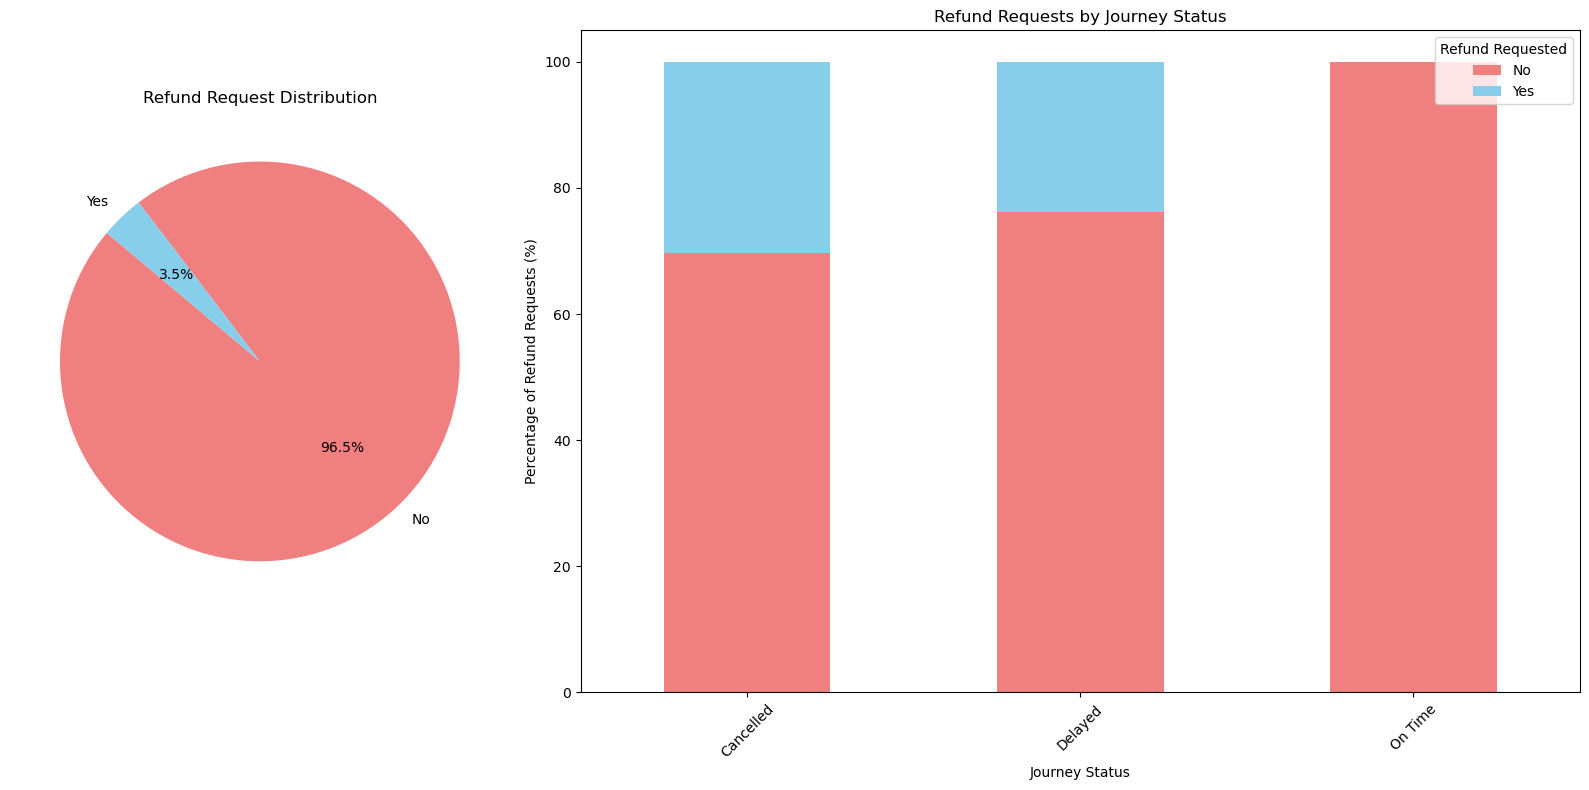

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 2]})

#Pie chart for percentage of refund requests
refund_requests = df['Refund.Request'].value_counts(normalize=True) * 100
axes[0].pie(refund_requests, labels=refund_requests.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue'])
axes[0].set_title('Refund Request Distribution')

#Bar chart for refund request - journey status relation
refund_status_relation = df.groupby(['Journey.Status', 'Refund.Request']).size().unstack().fillna(0)
refund_status_percentage = refund_status_relation.div(refund_status_relation.sum(axis=1), axis=0) * 100
refund_status_percentage.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'], ax=axes[1])
axes[1].set_title('Refund Requests by Journey Status')
axes[1].set_xlabel('Journey Status')
axes[1].set_ylabel('Percentage of Refund Requests (%)')
axes[1].legend(title='Refund Requested', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

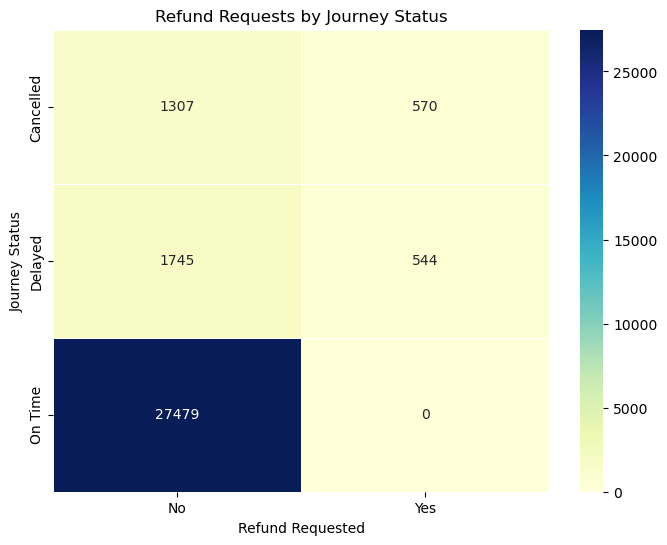

In [24]:
#Heatmap for refund requests by journey status
plt.figure(figsize=(8, 6))
sns.heatmap(refund_status_relation, annot=True, cmap='YlGnBu', fmt=".0f", linewidths=0.5)
plt.title('Refund Requests by Journey Status')
plt.xlabel('Refund Requested')
plt.ylabel('Journey Status')
plt.show()


C:\Users\emrec\AppData\Local\Temp\ipykernel_82612\1182555319.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ticket_type_price, x='Ticket.Type', y='Price',  palette='Set1')


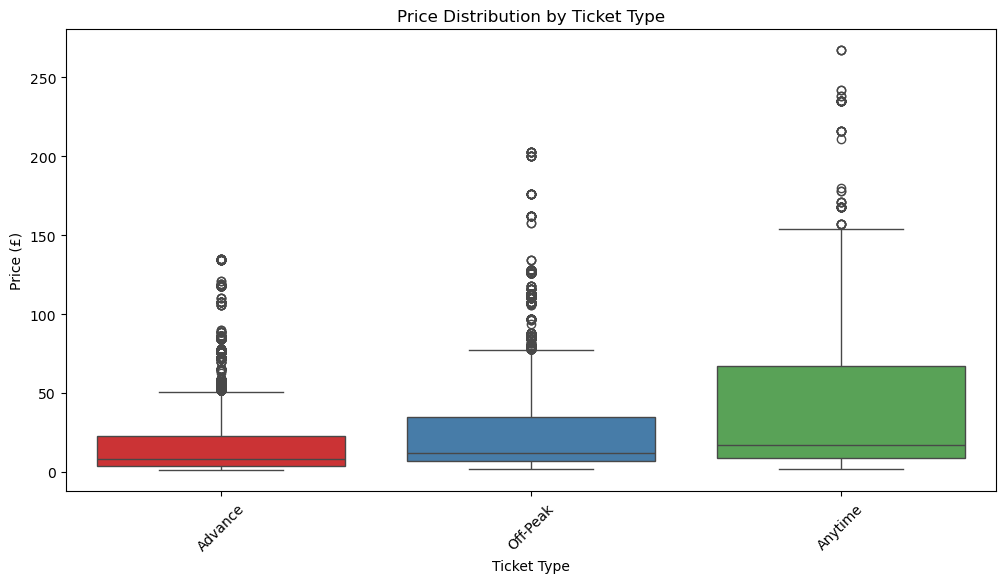

In [26]:
#Price distribution according to ticket type
ticket_type_price = df[['Ticket.Type', 'Price']].dropna()

plt.figure(figsize=(12, 6))
sns.boxplot(data=ticket_type_price, x='Ticket.Type', y='Price',  palette='Set1')
plt.title('Price Distribution by Ticket Type')
plt.xlabel('Ticket Type')
plt.ylabel('Price (£)')
plt.xticks(rotation=45)
plt.show()


**2. Delay In Minutes**

In [31]:
df['DelayInMinutes'] = None

#Convert datees columns to datetime objects
df['Scheduled.Arrival'] = pd.to_datetime(df['Scheduled.Arrival'])
df['Actual.Arrival'] = pd.to_datetime(df['Actual.Arrival'])

#Calculate the delay in minutes
df['DelayInMinutes'] = (df['Actual.Arrival'] - df['Scheduled.Arrival']).dt.total_seconds() / 60

#Setting values to NA if it is not delayed
df.loc[df['DelayInMinutes'] <= 0, 'DelayInMinutes'] = pd.NA

df.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request,Departure.Hour,Arrival.Hour,DelayInMinutes
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,On Time,NaN,No,11.0,13.0,NaN
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure,No,9.0,11.0,5.0
2,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,On Time,NaN,No,18.0,18.0,NaN
3,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,On Time,NaN,No,21.0,22.0,NaN
4,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,On Time,NaN,No,16.0,19.0,NaN


**3. Medium Price**

In [34]:
filtered = df[df['Journey.Status'] != 'On Time']
filtered.head()

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request,Departure.Hour,Arrival.Hour,DelayInMinutes
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure,No,9.0,11.0,5.0
8,Credit Card,NaN,Standard,Advance,37,London Euston,York,2024-01-01 00:00:00,2024-01-01 01:50:00,2024-01-01 02:07:00,Delayed,Signal Failure,No,0.0,2.0,17.0
20,Debit Card,Adult,Standard,Advance,7,Birmingham New Street,Manchester Piccadilly,2024-01-01 11:15:00,2024-01-01 12:35:00,2024-01-01 13:06:00,Delayed,Technical Issue,Yes,11.0,13.0,31.0
26,Credit Card,Senior,First Class,Advance,34,Oxford,Bristol Temple Meads,2024-01-01 14:15:00,2024-01-01 15:30:00,2024-01-01 15:54:00,Delayed,Signal Failure,Yes,14.0,15.0,24.0
39,Credit Card,NaN,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-02 02:15:00,2024-01-02 03:35:00,NaT,Cancelled,Technical Issue,No,2.0,NaN,NaN


In [35]:
filtered['MediumPrice'] =  (filtered['Price'] > 10) & (filtered['Price'] <= 30)

print(filtered[['Price', 'MediumPrice','Refund.Request']].head(5))

    Price  MediumPrice Refund.Request
1      23         True             No
8      37        False             No
20      7        False            Yes
26     34        False            Yes
39      7        False             No


C:\Users\emrec\AppData\Local\Temp\ipykernel_82612\3580612988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['MediumPrice'] =  (filtered['Price'] > 10) & (filtered['Price'] <= 30)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [38]:
filtered['Refund.Request'] = filtered['Refund.Request'].map({'Yes': 1, 'No': 0})

C:\Users\emrec\AppData\Local\Temp\ipykernel_82612\2282492401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Refund.Request'] = filtered['Refund.Request'].map({'Yes': 1, 'No': 0})


In [40]:
#Dependent and independent variables
X = filtered[['MediumPrice']]
y = filtered['Refund.Request']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#Model prediction and test
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       615
           1       0.00      0.00      0.00       219

    accuracy                           0.74       834
   macro avg       0.37      0.50      0.42       834
weighted avg       0.54      0.74      0.63       834



C:\Users\emrec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\emrec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\emrec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
#Calculation for £5 and £25
test_data = pd.DataFrame({'MediumPrice': [(5 > 10) & (5 <= 30), (25 > 10) & (25 <= 30)]})


#Prediction of probabilities
refund_probabilities = model.predict_proba(test_data)


print(f"Probability of requesting a refund for £5 ticket: {refund_probabilities[0][1]:.2f}")
print(f"Probability of requesting a refund for £25 ticket: {refund_probabilities[1][1]:.2f}")


Probability of requesting a refund for £5 ticket: 0.26
Probability of requesting a refund for £25 ticket: 0.32


In [43]:
model.intercept_

array([-1.05979002])

In [44]:
model.coef_

array([[0.30807428]])

**4. Regression**

In [46]:
predict_df = pd.read_csv("/Users/emrec/Desktop/SML Assignment/ToPredict.csv")
predict_df.head(8)

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay
0,Debit Card,NaN,First Class,Advance,54,London St Pancras,Birmingham New Street,2024-01-04 17:45,2024-01-04 19:05,2024-01-04 19:05,On Time,NaN
1,Credit Card,NaN,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-05 08:15,2024-01-05 09:35,2024-01-05 09:35,On Time,NaN
2,Debit Card,NaN,Standard,Off-Peak,113,Liverpool Lime Street,London Euston,2024-01-09 15:30,2024-01-09 17:45,2024-01-09 18:07,Delayed,Staffing
3,Contactless,Adult,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-31 05:45,2024-01-31 06:15,2024-01-31 06:49,Delayed,Signal Failure
4,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-02-10 16:00,2024-02-10 16:30,NaN,Cancelled,Technical Issue
5,Contactless,NaN,Standard,Advance,3,Manchester Piccadilly,Liverpool Lime Street,2024-02-25 15:45,2024-02-25 16:15,NaN,Cancelled,Staffing
6,Debit Card,NaN,Standard,Off-Peak,126,Manchester Piccadilly,London Euston,2024-03-20 15:30,2024-03-20 17:20,2024-03-20 17:36,Delayed,Staffing
7,Credit Card,NaN,Standard,Advance,22,Birmingham New Street,London St Pancras,2024-04-16 04:30,2024-04-16 05:50,NaN,Cancelled,Signal Failure


In [48]:
#Having a dataframe for just refund request = yes values
yes_df = df[df['Refund.Request'] == 'Yes']

In [60]:
total_yes = yes_df.shape[0]

In [62]:
print(total_yes)

1114


In [64]:
#Having a dataframe for just refund request = no values
no_df = df[df['Refund.Request'] == 'No']

In [66]:
no_df.shape[0]

30531

In [68]:
#Having the first 1114 data to have equal number of refund request = yes and refund request = no cases
new_no = no_df.head(1114)

In [70]:
new_no.shape[0]

1114

In [72]:
#Combining and shuffling the 2 dataframes so that we will have a new dataset to train our model
#to get rid of the bias, since original data has way more refund request = no cases
combined_df = pd.concat([yes_df, new_no])

shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [74]:
shuffled_df.shape[0]

2228

In [76]:
X = pd.get_dummies(shuffled_df[['Price','Journey.Status']], drop_first=True)
y = shuffled_df['Refund.Request']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [78]:
lm_model = LogisticRegression(max_iter=1000, random_state=42)
lm_model.fit(X_train, y_train)

y_pred = lm_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       1.00      0.91      0.96       223
         Yes       0.92      1.00      0.96       223

    accuracy                           0.96       446
   macro avg       0.96      0.96      0.96       446
weighted avg       0.96      0.96      0.96       446



In [80]:
predict_df = pd.get_dummies(predict_df, drop_first=True)

missing_cols = set(X_train.columns) - set(predict_df.columns)
for col in missing_cols:
    predict_df[col] = 0

predict_df = predict_df[X_train.columns]

refund_probabilities = lm_model.predict_proba(predict_df)[:, 1]  # İade talebi olasılığı

predict_df['Refund.Probability'] = refund_probabilities

print(predict_df[['Refund.Probability']].head(8))

   Refund.Probability
0            0.006090
1            0.009763
2            0.857410
3            0.948203
4            0.920594
5            0.921330
6            0.840556
7            0.906214


In [82]:
threshold = 0.5
predict_df['Refund'] = predict_df['Refund.Probability'].apply(lambda prob: 'Yes' if prob >= threshold else 'No')
predict_df.sort_values(by='Refund.Probability', ascending=False)

,Price,Journey.Status_Delayed,Journey.Status_On Time,Refund.Probability,Refund
3,3,True,False,0.948203,Yes
5,3,False,False,0.921330,Yes
4,4,False,False,0.920594,Yes
7,22,False,False,0.906214,Yes
2,113,True,False,0.857410,Yes
6,126,True,False,0.840556,Yes
1,7,False,True,0.009763,No
0,54,False,True,0.006090,No


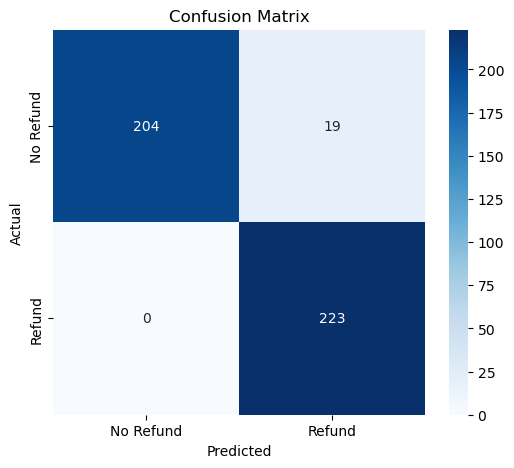

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Refund', 'Refund'], 
            yticklabels=['No Refund', 'Refund'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [92]:
#End of the Notebook